In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from tqdm import tqdm

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

In [68]:
rec = np.load(f"logo_records.npy", allow_pickle=True).item()

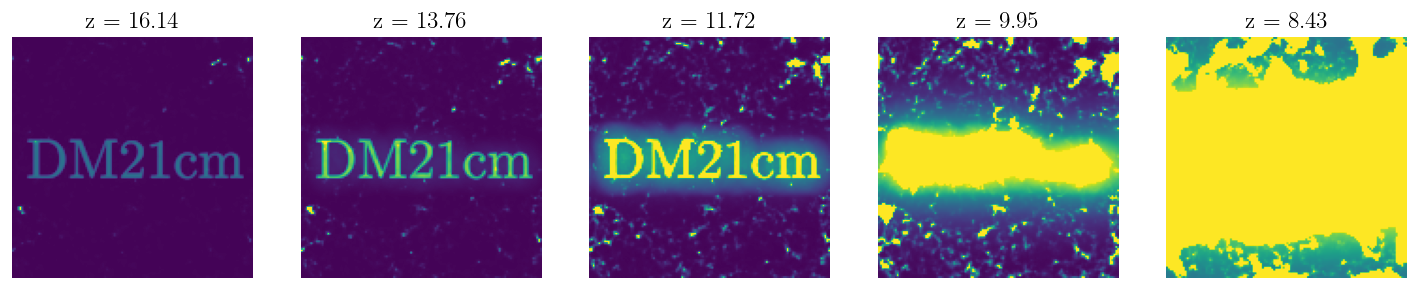

In [65]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

for i, i_z in enumerate(np.arange(40, 100+1, 15)):
    axs[i].imshow(1 - rec['x_H_slice'][i_z], origin='lower', cmap=cms['viridis'], vmin=0, vmax=1)
    axs[i].set_title(f"z = {rec['z'][i_z]:.2f}")
    axs[i].axis('off')

In [69]:
for i in tqdm(range(50, 110)):
    plt.imshow(1 - rec['x_H_slice'][i], origin='lower', vmin=0, vmax=1)
    plt.axis('off')
    plt.savefig(f"plots/{i}.png")
    plt.close()

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████| 60/60 [00:05<00:00, 10.35it/s]


In [36]:
def is_white(rgba, tolerance=10):
    rgb = np.array(rgba[:3])
    white = np.array([255, 255, 255])
    return np.linalg.norm(rgb - white) < tolerance
is_white_image = np.vectorize(is_white, signature='(4)->()', excluded=['tolerance'])
# def crop(image):
#     image_data = np.array(image)
#     non_empty_columns = np.where(np.sum(~is_white_image(image_data), axis=0))[0]
#     non_empty_rows = np.where(np.sum(~is_white_image(image_data), axis=1))[0]
#     cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))
#     image_data_new = image_data[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
#     return Image.fromarray(image_data_new)

In [42]:
iw = is_white_image(Image.open(f'tmp/70.png'))
print(np.min(np.where(~iw[:,100])), np.max(np.where(~iw[:,100])))
print(np.min(np.where(~iw[100,:])), np.max(np.where(~iw[100,:])))

11 380
12 381


In [43]:
def crop(image):
    image_data = np.array(image)
    return Image.fromarray(image_data[11:381, 12:382, :])

In [44]:
from PIL import Image

images = []
for i in range(50, 110):
    image = Image.open(f'tmp/{i}.png')
    images.append(crop(image))
images[0].save('xH.gif', save_all=True, append_images=images[1:], optimize=False, duration=250, loop=0)

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████| 60/60 [00:02<00:00, 28.92it/s]


## ST-ish Scale

In [39]:
z = np.linspace(5, 45, 100)
m = (z/20) ** -10
m = np.clip(m, 0, 1e4)
m = np.where(m < 10, np.log(np.exp(m) + np.exp(1)), m)

/tmp/ipykernel_128821/2508147374.py:4: RuntimeWarning: overflow encountered in exp
  m = np.where(m < 10, np.log(np.exp(m) + np.exp(1)), m)


[]

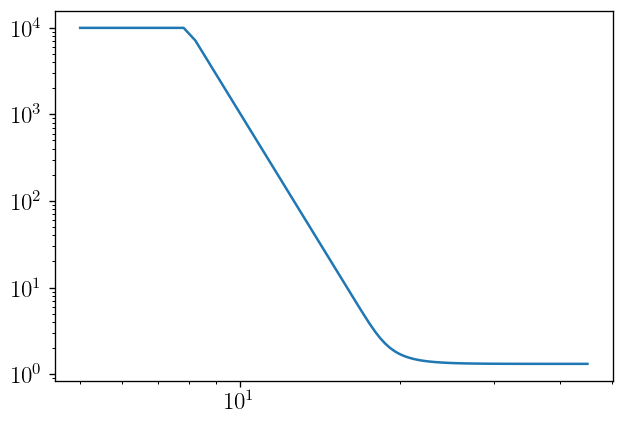

In [40]:
plt.plot(z, m)
plt.loglog()